# **Bitly Data from 1.USA.gov**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json

bitly_usa_path = "/home/juan-wills/Documents/Data-analysis-Machine-learning/Material/datasets/bitly_usagov/example.txt"

with open(bitly_usa_path, 'r') as f:
    records = [json.loads(data) for data in f]

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [ ]:
df = pd.DataFrame(records)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

(3560, 18)

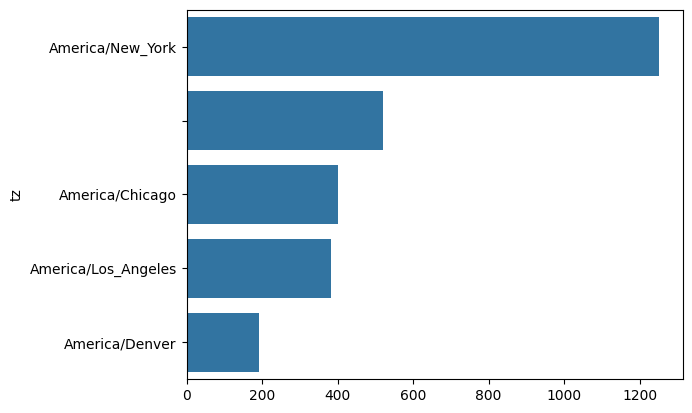

In [ ]:
tz_records = df["tz"].value_counts().head()
tz_records.plot(kind="barh", title="Top 5 Time Zones")

In [12]:
browser_capability = pd.Series([x.split()[0] for x in df["a"].dropna()])
browser_capability.value_counts().head()

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
Name: count, dtype: int64

In [ ]:
cdf = df[df["a"].notna()].copy()
cdf["os"] = np.where(cdf["a"].str.contains('Windows', case=False, regex=False), "Windows", "Not Windows")
by_tz_os = cdf.groupby(["tz", "os"])

agg_counts = by_tz_os.size().unstack().fillna(0.)
indexer = agg_counts.sum("columns").argsort()
count_subset = agg_counts.take(list(indexer[-10:]))
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [23]:
count_subset_stack = count_subset.stack()
count_subset_stack.name = "total"
count_subset_stack = count_subset_stack.reset_index()
count_subset_stack


,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


/tmp/ipykernel_53855/3763894148.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset_stack.groupby(["tz"]).apply(normalize)


<Axes: xlabel='normed_total', ylabel='tz'>

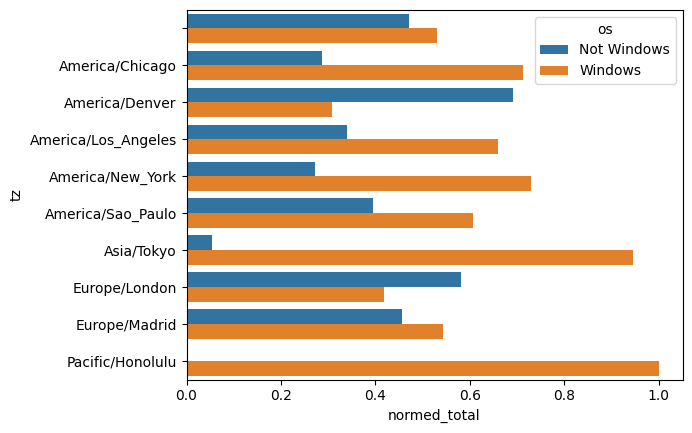

In [28]:
def normalize(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset_stack.groupby(["tz"]).apply(normalize)

sns.barplot(x="normed_total", y="tz", hue="os", data=results)